<a href="https://colab.research.google.com/github/TERE-20/Inteligencia-Artificial/blob/main/practica2_PerceptronMulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_inter = n_inter
        self.random_state = random_state


    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.error_ = []


        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.error_.append(errors)
        return self

    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    def predict(self, x):
        return np.where(self.net_input(x) >= 0.0, 1, -1)


v1 = np.array([1, 2, 3])
v2 = 0.5 * v1

np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data', header=None)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g
350,1,0,0.84710,0.13533,0.73638,-0.06151,0.87873,0.08260,0.88928,-0.09139,...,-0.15114,0.81147,-0.04822,0.78207,-0.00703,0.75747,-0.06678,0.85764,-0.06151,g


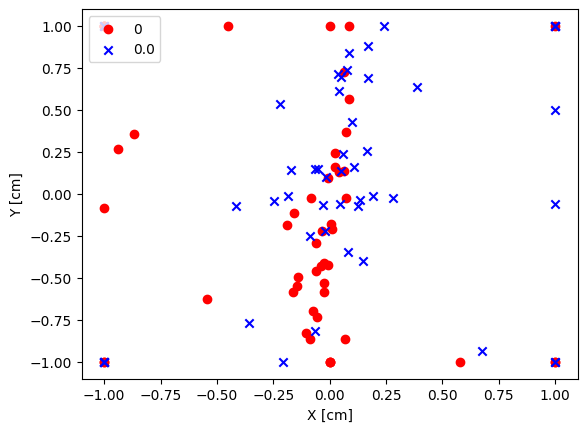

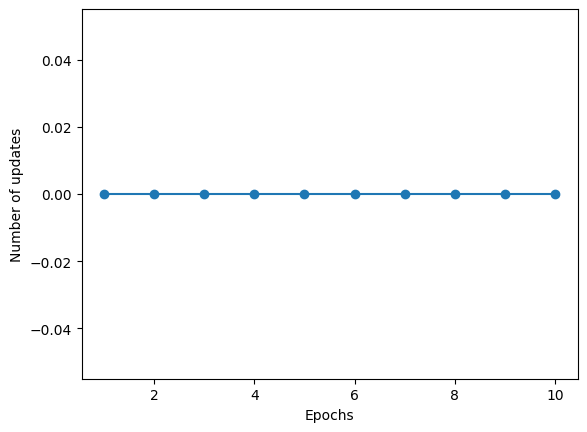

In [ ]:
y = df.iloc[0:100, 0].values
y = np.where(y == 'g', -1, 1)

x = df.iloc[0:100, [3, 27]].values

plt.scatter(x[:50, 0], x[:50, 1],
            color='red', marker='o', label='0')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color='blue', marker='x', label='0.0')

plt.xlabel('X [cm]')
plt.ylabel('Y [cm]')
plt.legend(loc='upper left')

plt.show()

ppn = Perceptron(eta=0.1, n_inter=10)
ppn.fit(x, y)

plt.plot(range(1, len(ppn.error_) + 1), ppn.error_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()